In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_csv("Universities.csv")

In [3]:
Univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [27]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,clusterid_new
0,Brown,1310,89,22,13,22704,94,2,0
1,CalTech,1415,100,25,6,63575,81,3,0
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,2,0
4,Cornell,1280,83,33,13,21864,90,0,0


In [5]:
Univ.iloc[:,1:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [6]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [7]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_Univ_df)
#

KMeans(n_clusters=4, random_state=0)

In [10]:
Univ["Cluster"] = kmeans.predict(scaled_Univ_df)

In [11]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


# Elbow

In [12]:
kmeans.inertia_ #Within a cluster sum 0f square

33.654341806512235

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    dist = kmeans.inertia_
    wcss.append(dist)

C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.9536816278831,
 23.028199078329926,
 18.56891703085987,
 16.301664640974554,
 13.47880438976081,
 10.640545447539141]

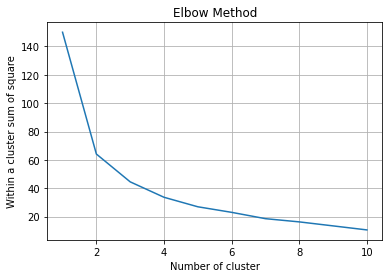

In [15]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within a cluster sum of square")
plt.grid()

In [16]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=0)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=2, random_state=0)

In [17]:
clusters_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [18]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [19]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,clusterid_new
0,Brown,1310,89,22,13,22704,94,2,0
1,CalTech,1415,100,25,6,63575,81,3,0
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,2,0
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,2,0
6,Duke,1315,90,30,12,31585,95,2,0
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,2,0
9,JohnsHopkins,1305,75,44,7,58691,87,3,0


In [20]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.42676654,  0.42644236, -0.39319697, -0.36886734,  0.28888223,
         0.34705112],
       [-1.70706618, -1.70576943,  1.57278787,  1.47546937, -1.15552891,
        -1.38820448]])

In [21]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,clusterid_new
0,Brown,1310,89,22,13,22704,94,2,0
1,CalTech,1415,100,25,6,63575,81,3,0
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,2,0
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,2,0
6,Duke,1315,90,30,12,31585,95,2,0
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,2,0
9,JohnsHopkins,1305,75,44,7,58691,87,3,0


In [22]:
#What is avarage of top10 for cluster 1 = 86.6
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_11728\2071623434.py:2: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Univ.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
,,mean,mean,mean,mean,mean,mean,mean
0,0,1311.75,84.6,31.6,11.25,31470.9,89.8,1.2
1,1,1085.20,44.0,69.6,18.60,11056.4,74.4,0.8


In [23]:
Univ[Univ['clusterid_new']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,clusterid_new
13,PennState,1081,38,54,18,10185,80,1,1
15,Purdue,1005,28,90,19,9066,69,1,1
17,TexasA&M,1075,49,67,25,8704,67,1,1
20,UMichigan,1180,65,68,16,15470,85,0,1
23,UWisconsin,1085,40,69,15,11857,71,1,1


In [24]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,clusterid_new
0,Brown,1310,89,22,13,22704,94,2,0
1,CalTech,1415,100,25,6,63575,81,3,0
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,2,0
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,2,0
6,Duke,1315,90,30,12,31585,95,2,0
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,2,0
9,JohnsHopkins,1305,75,44,7,58691,87,3,0


In [25]:
Univ["clusterid_new"].value_counts()

0    20
1     5
Name: clusterid_new, dtype: int64